Try reading images

(480, 640)


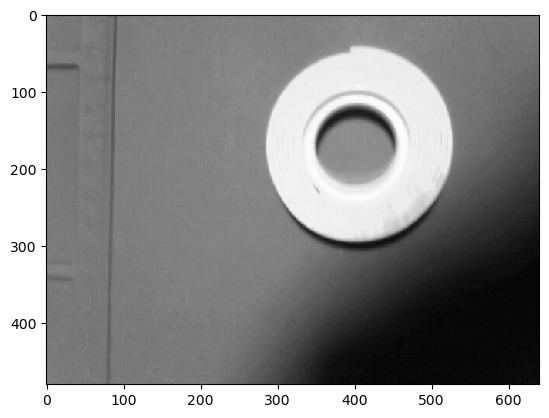

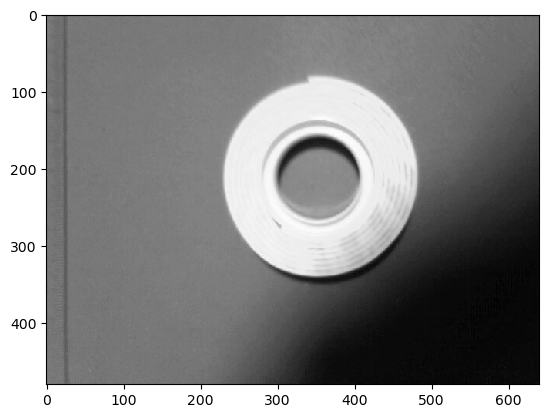

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im1 = cv2.cvtColor(cv2.imread('raw_pic_1.jpg'), cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(cv2.imread('raw_pic_2.jpg'), cv2.COLOR_BGR2GRAY)
print(im1.shape)

plt.imshow(im1,cmap='gray')
plt.show()
plt.imshow(im2,cmap='gray')
plt.show()


(480, 640, 3)


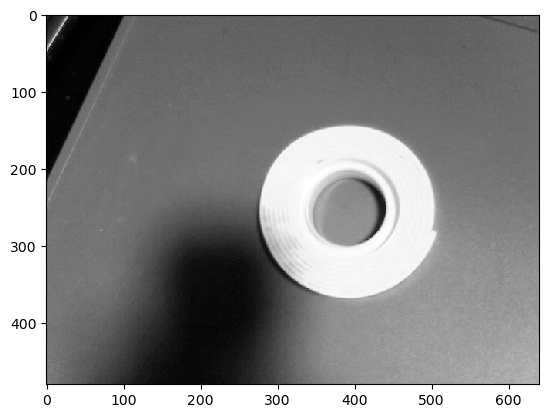

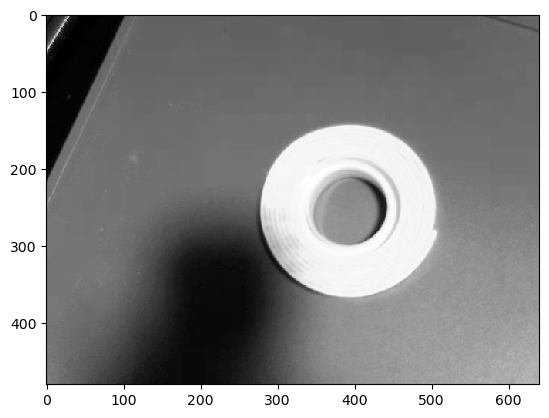

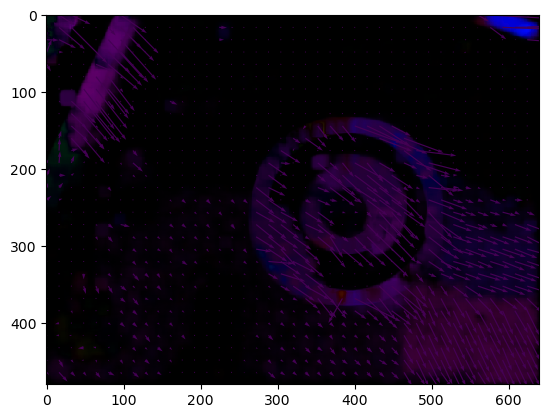

In [31]:

cap = cv2.VideoCapture('raw_vid_1.webm')

ret, first_frame = cap.read()

prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255
print(mask.shape)

plt.imshow(prev_gray, cmap='gray')
plt.show()


ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

# Calculates dense optical flow by Farneback method
flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, 
                                    None,
                                    0.5, 3, 15, 3, 5, 1.2, 0)
# Computes the magnitude and angle of the 2D vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
# Sets image hue according to the optical flow 
# direction
mask[..., 0] = angle * 180 / np.pi / 2
    
# Sets image value according to the optical flow
# magnitude (normalized)
mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    
# Converts HSV to RGB (BGR) color representation
rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    
# Opens a new window and displays the output frame

u = flow[::16,::16, 0]
v = flow[::16,::16, 1]
x = np.arange(0,640,16)
y = np.arange(0,480,16)
c = np.ones_like(u)*255

plt.imshow(rgb, cmap='gray')
plt.quiver(x,y,u,v,c)
plt.show()
    
